# 3D Print Index

The purpose is to create a 3D printing index. The first key step is to decide the universe of 3D printing company stocks. I start from Russell 3000. I extract 10K from SEC for all stocks in Russell, choose stocks related to 3D printing. After getting the initial pool of stocks, use clusters to check company behaviors. Afterwards, test different weighting scheme to construct portfolio for index construction. Details are discussed in the following.

In [36]:
import time
from SECscrawler import SecCrawler 
import os

### Step 1. Get filing information from SEC website for stocks in Russell 3000

In [24]:
#Define function to get 10-K filing from SEC.
def get_filings(companyCode,cik,date,count):
    t1 = time.time()

    # create object
    seccrawler = SecCrawler()
    seccrawler.filing_10K(str(companyCode), str(cik), str(date), str(count))

    t2 = time.time()
    print "Total Time taken: ",
    print (t2-t1) 

In [15]:
import pandas as pd

Load in list of stocks in Russell 3000 and CIK. <font color='red'>Future Improvement  1: This is a list downloaded from website, not complete though. This can be extract from SEC website as futuer improvement.</font>

In [29]:
rus=pd.read_csv('Russell-3000-Stock-Tickers-List.csv')
cik=pd.read_csv('cik_ticker.csv')
rus_cik=pd.merge(rus,cik,on='Ticker',how='inner')
rus_cik

,Ticker,Company,CIK,Name,Exchange,SIC,Business,Incorporated,IRS
0,A,AGILENT TECHNOLOGIES INC,1090872,Agilent Technologies Inc,NYSE,3825.0,CA,DE,770518772.0
1,AA,ALCOA CORPORATION,4281,Alcoa Inc,NYSE,3350.0,PA,PA,250317820.0
2,AAC,AAC HOLDINGS INC,1099290,Sinocoking Coal & Coke Chemical Industries Inc,NASDAQ,3312.0,F4,FL,593404233.0
3,AAL,AMERICAN AIRLINES GROUP,6201,American Airlines Group Inc,NASDAQ,4512.0,TX,DE,751825172.0
4,AAN,AARONS INC,706688,Aarons Inc,NYSE,7359.0,GA,GA,580687630.0
5,AAOI,APPLIED OPTOELECTRONICS,1158114,Applied Optoelectronics Inc,NASDAQ,3674.0,TX,DE,760533927.0
6,AAON,AAON INC,824142,Aaon Inc,NASDAQ,3585.0,OK,NV,870448736.0
7,AAP,ADVANCE AUTO PARTS INC,1158449,Advance Auto Parts Inc,NYSE,5531.0,VA,DE,542049910.0
8,AAPL,APPLE INC,320193,Apple Inc,NASDAQ,3571.0,CA,CA,942404110.0
9,AAT,AMERICAN ASSETS TRST INC,1500217,American Assets Trust Inc,NYSE,6798.0,CA,MD,NaN


In [32]:
rus_cik['CIK'].isnull().sum() #Check whether there is null value in CIK fields for selected stocks

0

In [34]:
#Download 10K from SEC
for i in range(len(rus_cik)):
    tick=str(rus_cik.iloc[i]['Ticker'])
    CIK=str(rus_cik.iloc[i]['CIK'])
    get_filings(tick,CIK,'20150101','1')

started !0-KA
('Number of files to download %s', 10)
Starting download....
Successfully downloaded all the files
Total Time taken:  44.6799998283
started !0-KAA
('Number of files to download %s', 10)
Starting download....
Successfully downloaded all the files
Total Time taken:  53.6970000267
started !0-KAAC
('Number of files to download %s', 10)
Starting download....
Successfully downloaded all the files
Total Time taken:  19.359000206
started !0-KAAL
('Number of files to download %s', 10)
Starting download....
Successfully downloaded all the files
Total Time taken:  24.7670001984
started !0-KAAN
('Number of files to download %s', 10)
Starting download....
Successfully downloaded all the files
Total Time taken:  24.9390001297
started !0-KAAOI
('Number of files to download %s', 1)
Starting download....
Successfully downloaded all the files
Total Time taken:  7.15100002289
started !0-KAAON
('Number of files to download %s', 10)
Starting download....
Successfully downloaded all the files


### Step 2. Choose 3D related companies in Russell 3000 as initial selection pool

In [83]:
os.chdir('D:\seven')
os.getcwd()

'D:\\seven'

In [84]:
freq=pd.DataFrame()
freq=rus_cik

Current use 3 groups of keywords to identify relevant companies. First group: 3D print as direct keywords for 3d printing industry. Second group and third group includes keywords for relevant industry. <font color='red'>Future Improvement 2: As future improvement, we can use other NLP tools to choose keywords to scan the files.</font>

In [85]:
count=0
l_3d=[]
l_cad=[]
l_mat=[]
for i in range(len(rus_cik)):
    tick=str(rus_cik.iloc[i]['Ticker'])
    CIK=str(rus_cik.iloc[i]['CIK'])
    path="SEC\\"+tick+"\\"+CIK+"\\10-K\\"
    ct_3d=ct_cad=ct_mat=0
    for file in os.listdir(path):
        if file.endswith(".txt"):
            file=os.path.join(path,file)
            f=open(file)
            contents=f.read()
            f.close()
            F1=contents.lower().count("3D PRINT".lower())+contents.lower().count("3-D PRINT".lower())
            ct_3d+=F1
            
            F2=contents.count("CAD")
            ct_cad+=F2
            
            F31=contents.lower().count("materials".lower())
            F32=contents.lower().count("technology".lower())
            if (F31 and F32):
                ct_mat+=F31
            
    l_3d.append(ct_3d)
    l_cad.append(ct_cad)
    l_mat.append(ct_mat)
    count+=1
    print count
freq['Flag_3D']=l_3d
freq['Flag_CAD']=l_cad
freq['Flag_Materials']=l_mat

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [138]:
os.chdir('C:\Users\Qian\Documents\New folder')

In [139]:
freq.to_csv("info.csv")
freq[freq['Flag_3D']>0].to_csv("list.csv")

### Step 3. Supply Chain Analysis
Use Companies identified in previous step in 3D printing to discover upper level companies to provide materials and services. <font color='red'>(This filter logic does not work well, can seek for alternative filter logic in future) </font>

In [115]:
List_3D=list(freq[freq['Flag_3D']>0]['Ticker'])

In [131]:
os.chdir('D:\seven')

count=0
l=[]
for i in range(len(rus_cik)):
    tick=str(rus_cik.iloc[i]['Ticker'])
    CIK=str(rus_cik.iloc[i]['CIK'])
    path="SEC\\"+tick+"\\"+CIK+"\\10-K\\"
    found=False
    for file in os.listdir(path):
        if file.endswith(".txt"):
            file=os.path.join(path,file)
            f=open(file)
            contents=f.read()
            f.close()
            
            for x in List_3D:
                if (x in contents) and (tick not in List_3D):
                    found=True
           
    l.append(found)

    count+=1
    print count
freq['Flag_supply']=l

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


### Step 4. Fetch stock data from Yahoo for selected stocks

In [140]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [141]:
start=datetime.datetime(2014,12,30)
end=datetime.datetime(2016,1,1)
df=pd.read_csv('list.csv')
df

,Unnamed: 0,Ticker,Company,CIK,Name,Exchange,SIC,Business,Incorporated,IRS,Flag_3D,Flag_CAD,Flag_Materials,Flag_supply
0,543,COHR,COHERENT INC,21510,Coherent Inc,NASDAQ,3826.0,CA,DE,941622541.0,1,594,645,False
1,674,DDD,3D SYSTEMS CORP,910638,3D Systems Corp,NYSE,7372.0,SC,DE,954431352.0,418,171,1851,False
2,1163,HPQ,HP INC,47217,Hewlett Packard Co,NYSE,3570.0,CA,DE,941081436.0,1,23,292,False
3,1227,IMAX,IMAX CORP,921582,Imax Corp,NYSE,3861.0,A6,A6,980140269.0,23,12,230,False
4,1261,IPGP,IPG PHOTONICS CORP,1111928,Ipg Photonics Corp,NASDAQ,3674.0,MA,DE,43444218.0,2,24,805,False
5,1565,MRC,MRC GLOBAL INC,1517990,Maxwell Resources Inc,NYSE,2750.0,NV,NV,331219696.0,11,0,1,False
6,1574,MRVL,MARVELL TECHNOLOGY GROUP,1058057,Marvell Technology Group LTD,NASDAQ,3674.0,D0,D0,770481679.0,1,38,75,False
7,1774,ONVO,ORGANOVO HLDGS INC,1497253,Organovo Holdings Inc,NYSE MKT,2836.0,CA,DE,271488943.0,2,6,125,False
8,1937,PRLB,PROTO LABS INC,1443669,Proto Labs Inc,NYSE,3440.0,MN,NaN,NaN,6,78,128,False
9,2116,SCSC,SCANSOURCE INC,918965,Scansource Inc,NASDAQ,5045.0,SC,SC,570965380.0,9,115,183,False


In [142]:
dict={}
for i in range(len(df)):
    tick=df['Ticker'].iloc[i]
    dict[tick]=data.DataReader(tick,'yahoo',start,end)

In [98]:
tickers=dict.keys()

In [100]:
#select stocks with long history
stocks=pd.concat([dict[x] for x in tickers if len(dict[x])>250],axis=1,join='inner',keys=tickers)
stocks.columns.names = ['Ticker','Stock Info']
stocks

Ticker           XONE                                                      \
Stock Info       Open       High        Low      Close  Adj Close  Volume   
Date                                                                        
2014-12-30  16.870001  17.280001  16.299999  16.420000  16.420000  462800   
2014-12-31  16.420000  17.170000  16.170000  16.799999  16.799999  438800   
2015-01-02  16.969999  17.450001  16.209999  16.559999  16.559999  216300   
2015-01-05  16.610001  17.120001  16.000000  16.650000  16.650000  435300   
2015-01-06  16.730000  16.740000  16.000000  16.629999  16.629999  301600   
2015-01-07  16.830000  17.270000  16.190001  16.799999  16.799999  325000   
2015-01-08  16.840000  17.889999  16.680000  17.520000  17.520000  550900   
2015-01-09  17.709999  17.920000  16.490000  16.530001  16.530001  367200   
2015-01-12  16.650000  16.840000  15.450000  15.650000  15.650000  431400   
2015-01-13  16.549999  16.549999  14.610000  14.970000  14.970000  474500   
2015-01-14  14.770000  15.110000  14.230000  14.680000  14.680000  296100   
2015-01-15  14.810000  14.810000  13.850000  14.070000  14.070000  302100   
2015-01-16  14.020000  14.280000  13.780000  14.160000  14.160000  250100   
2015-01-20  14.120000  14.500000  13.670000  14.210000  14.210000  312100   
2015-01-21  14.220000  15.030000  13.930000  14.610000  14.610000  361800   
2015-01-22  14.910000  15.140000  14.410000  14.740000  14.740000  222600   
2015-01-23  15.190000  15.270000  14.640000  14.890000  14.890000  261000   
2015-01-26  14.900000  15.440000  14.900000  15.000000  15.000000  236200   
2015-01-27  14.600000  14.950000  14.350000  14.750000  14.750000  328100   
2015-01-28  14.690000  14.760000  13.750000  14.160000  14.160000  303100   
2015-01-29  14.300000  14.670000  13.820000  14.440000  14.440000  238300   
2015-01-30  14.290000  14.730000  14.120000  14.350000  14.350000  179800   
2015-02-02  14.350000  14.670000  13.810000  14.470000  14.470000  204900   
2015-02-03  13.750000  14.300000  13.400000  13.930000  13.930000  438800   
2015-02-04  13.920000  14.350000  13.520000  13.700000  13.700000  270800   
2015-02-05  13.850000  14.450000  13.700000  14.150000  14.150000  318700   
2015-02-06  14.230000  14.430000  13.670000  13.890000  13.890000  204600   
2015-02-09  13.780000  14.730000  13.610000  14.590000  14.590000  288400   
2015-02-10  14.620000  15.950000  14.560000  15.820000  15.820000  563200   
2015-02-11  15.880000  16.670000  15.500000  16.020000  16.020000  372700   
...               ...        ...        ...        ...        ...     ...   
2015-11-18   6.580000   7.330000   6.580000   7.250000   7.250000  210300   
2015-11-19   7.300000   7.960000   7.270000   7.370000   7.370000  185500   
2015-11-20   7.360000   7.830000   7.270000   7.370000   7.370000  234200   
2015-11-23   7.370000   7.520000   7.200000   7.360000   7.360000  126700   
2015-11-24   7.250000   7.730000   7.250000   7.700000   7.700000  210900   
2015-11-25   7.700000   9.720000   7.700000   9.240000   9.240000  589300   
2015-11-27   9.150000  10.220000   9.000000   9.980000   9.980000  197700   
2015-11-30  10.100000  10.840000   9.730000   9.920000   9.920000  517200   
2015-12-01   9.890000  10.200000   9.630000   9.950000   9.950000  113100   
2015-12-02   9.990000  10.450000   9.840000   9.910000   9.910000  157000   
2015-12-03  10.020000  10.320000   9.730000   9.920000   9.920000  110500   
2015-12-04   9.950000  10.090000   9.630000   9.770000   9.770000   99600   
2015-12-07  10.680000  10.680000   9.770000   9.900000   9.900000  154800   
2015-12-08   9.810000  10.280000   9.450000   9.610000   9.610000  337900   
2015-12-09   9.540000   9.940000   9.490000   9.910000   9.910000  292500   
2015-12-10   9.940000  10.220000   9.700000  10.200000  10.200000  240600   
2015-12-11  10.260000  10.260000   9.450000   9.650000   9.650000  209300   
2015-12-14   9.570000   9.630000   8.770000   9.210000   9.210000  293200

In [144]:
stocks.describe()

Ticker            XONE                                                  \
Stock Info        Open        High         Low       Close   Adj Close   
count       254.000000  254.000000  254.000000  254.000000  254.000000   
mean         11.551969   11.939724   11.214094   11.548228   11.548228   
std           3.017900    3.043805    2.944563    2.986339    2.986339   
min           5.950000    6.690000    5.810000    6.190000    6.190000   
25%           9.292500    9.745000    9.002500    9.345000    9.345000   
50%          11.865000   12.340000   11.540000   11.850000   11.850000   
75%          14.142500   14.497500   13.807500   14.130000   14.130000   
max          17.709999   17.920000   16.680000   17.520000   17.520000   

Ticker                           SSYS                                      \
Stock Info         Volume        Open        High         Low       Close   
count          254.000000  254.000000  254.000000  254.000000  254.000000   
mean        226713.779528   41.411535   42.325709   40.468858   41.373780   
std         120369.479963   17.014383   17.189464   16.660528   16.930101   
min          66600.000000   22.240000   23.100000   22.150000   22.580000   
25%         136075.000000   28.835000   29.665000   28.074999   28.832500   
50%         206450.000000   35.055001   35.495001   34.259998   34.830000   
75%         290225.000000   57.000000   57.705000   55.815000   57.035000   
max         735600.000000   83.709999   84.470001   81.230003   83.110001   

Ticker          ...              DDD                                        \
Stock Info      ...              Low       Close   Adj Close        Volume   
count           ...       254.000000  254.000000  254.000000  2.540000e+02   
mean            ...        19.012953   19.403228   19.403228  2.872635e+06   
std             ...         7.937966    8.078100    8.078100  1.438423e+06   
min             ...         8.440000    8.520000    8.520000  9.731000e+05   
25%             ...        11.905000   12.180000   12.180000  1.929975e+06   
50%             ...        18.395000   18.785001   18.785001  2.506450e+06   
75%             ...        27.245000   27.832500   27.832500  3.354100e+06   
max             ...        32.110001   32.869999   32.869999  1.247060e+07   

Ticker             MRC                                                  \
Stock Info        Open        High         Low       Close   Adj Close   
count       254.000000  254.000000  254.000000  254.000000  254.000000   
mean         13.485000   13.754843   13.192283   13.475354   13.475354   
std           1.450143    1.436891    1.434978    1.432490    1.432490   
min          10.300000   10.790000   10.200000   10.370000   10.370000   
25%          12.432500   12.742500   12.082500   12.477500   12.477500   
50%          13.155000   13.355000   12.825000   13.090000   13.090000   
75%          14.705000   14.960000   14.395000   14.600000   14.600000   
max          17.290001   17.620001   16.850000   16.870001   16.870001   

Ticker                    
Stock Info        Volume  
count       2.540000e+02  
mean        2.209689e+06  
std         1.315943e+06  
min         4.021000e+05  
25%         1.441175e+06  
50%         1.948300e+06  
75%         2.599375e+06  
max         1.063460e+07  

[8 rows x 84 columns]

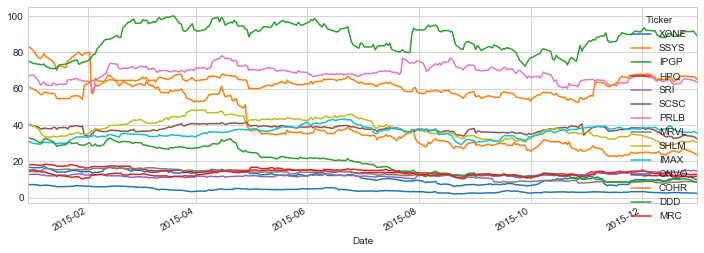

In [101]:
stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))

In [102]:
returns=pd.DataFrame()
for tick in tickers:
    returns[tick+' Return']=stocks[tick]['Close'].pct_change()
returns.head() 

,XONE Return,SSYS Return,IPGP Return,HPQ Return,SRI Return,SCSC Return,PRLB Return,MRVL Return,SHLM Return,IMAX Return,ONVO Return,COHR Return,DDD Return,MRC Return
Date,,,,,,,,,,,,,,
2014-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,0.023142,0.018006,-0.012391,-0.014489,0.019826,-0.004955,0.006142,0.002073,-0.010498,-0.006431,-0.053525,-0.019696,0.030731,-0.016234
2015-01-02,-0.014286,-0.024786,-0.012547,0.002741,0.007776,-0.015687,0.007296,0.001379,-0.020972,-0.028155,0.005517,-0.011858,-0.013690,0.012541
2015-01-05,0.005435,-0.049846,-0.006488,-0.016650,-0.003086,-0.014925,-0.047598,-0.016529,-0.047631,-0.015651,-0.030178,-0.033333,-0.051820,-0.036506
2015-01-06,-0.001201,-0.008181,-0.003129,-0.007582,-0.018576,-0.024653,-0.038181,0.038515,-0.039164,-0.002368,-0.062235,-0.020517,-0.019193,-0.020298


### Step 4. Weighting scheme to construct Index
#### 1. Equal Weight Index

In [103]:
test1=pd.DataFrame()
test1['Avg']=returns[1:].mean(axis=1)
test1['tmp']=stocks.xs(key='Close',level='Stock Info',axis=1).mean(axis=1)[1:]  

In [104]:
l=[test1['tmp'].iloc[0]]
for i in range(1,len(test1)):
    l.append(l[-1]*(1+test1['Avg'].iloc[i]))
test1['Idx']=l

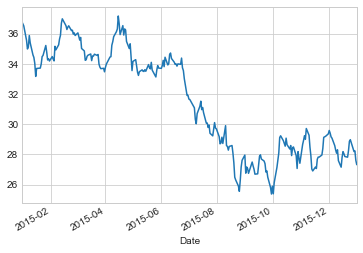

In [105]:
test1['Idx'].plot()

#### 2. Volume Weight Index

In [146]:
stocks.xs(key='Volume',axis=1,level='Stock Info').mean()

Ticker
XONE    2.267138e+05
SSYS    1.404436e+06
IPGP    4.223728e+05
HPQ     2.768011e+07
SRI     7.402283e+04
SCSC    1.351098e+05
PRLB    2.487476e+05
MRVL    7.142035e+06
SHLM    1.735677e+05
IMAX    7.674370e+05
ONVO    1.372590e+06
COHR    1.298154e+05
DDD     2.872635e+06
MRC     2.209689e+06
dtype: float64

Equal weight has bias toward small caps. Average volume for these stocks have different trading volume. We try volume adjusted weighting to construct index. Similarly, can use market value as well.

In [149]:
Price=stocks.xs(key='Close',axis=1,level='Stock Info')
Volume=stocks.xs(key='Volume',axis=1,level='Stock Info')

In [150]:
Vol_P=Volume*Price
Vol_P['Sum']=Vol_P.sum(axis=1)

Vol_wt=pd.DataFrame()
for tick in tickers:
    Vol_wt[tick]=Vol_P.apply(lambda x: x[tick]/x['Sum'],axis=1)

In [152]:
test2=Vol_wt*Price

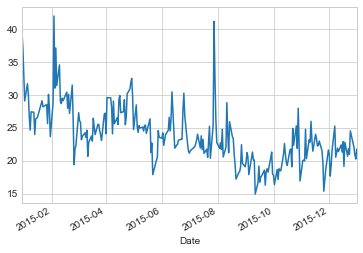

In [154]:
Idx2=test2.sum(axis=1)
Idx2.plot()

#### 3. Frequency Weight Index
Interestingly, although these companies mention 3D printing in their 10K, however, the frequency they mention the keywords differs quite a lot.

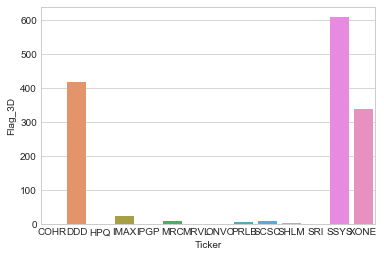

In [161]:
sns.barplot(x='Ticker',y='Flag_3D',data=df)

DDD, SSYS, XONE are three well known 3D printing companies in the industry. So I try to use the frequency to further adjust weight

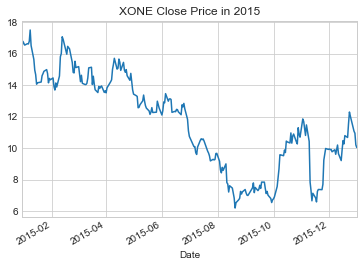

In [201]:
Price['XONE'].plot(title='XONE Close Price in 2015')

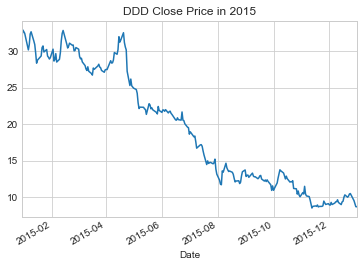

In [202]:
Price['DDD'].plot(title='DDD Close Price in 2015')

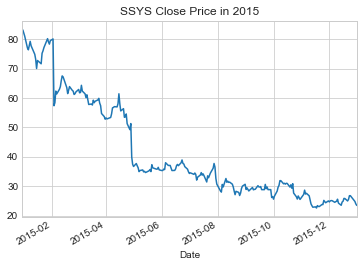

In [205]:
Price['SSYS'].plot(title='SSYS Close Price in 2015')

In [183]:
df['freq']=df.apply(lambda x: float(x['Flag_3D'])/t,axis=1)

In [191]:
Vol_adj=pd.DataFrame()
for i in range(len(df)):
    tick=df['Ticker'].iloc[i]
    freq=df['freq'].iloc[i]
    Vol_adj[tick]=Volume[tick]*Price[tick]*freq

In [194]:
Vol_adj['Sum']=Vol_adj.sum(axis=1)
Vol_adjwt=pd.DataFrame()
for tick in tickers:
    Vol_adjwt[tick]=Vol_adj.apply(lambda x: x[tick]/x['Sum'],axis=1)

In [196]:
test3=Vol_adjwt*Price

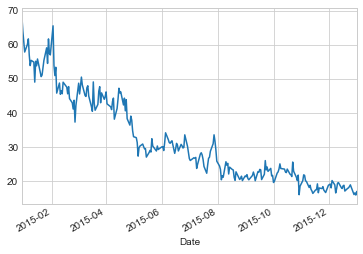

In [197]:
Idx3=test3.sum(axis=1)
Idx3.plot()

## Further consideration

1. Can consider a different universe other than Russell.
2. Use stocks from other relevant industries (for example: use the frequency data extracted for CAD)
3. Different weighting methods can be considered. For example, by volatility. Or extract relevant features and perform PCA or use clustering to check.